Decay rate of dipolar emitter
====================================

In this example, we demonstrate how the decay rate of a dipolar emitter is influenced by the presence of dielectric nanostructures (for the theory in the framework of the GDM, see also [1]).
In the following we will therefore rasterscan a dipolar emitter oscillating at a frequency of wavelength $\lambda=500$nm in a plane 15nm above a small dielectric sphere ($n=2$) and calculate the modification of the dipole decay rate at each position.



[1] Wiecha, P. R. et al. *Decay Rate of Magnetic Dipoles near Non-magnetic Nanostructures*. **arXiv** 1707.07006 (2017) (https://arxiv.org/abs/1707.07006)
 

Simulation setup
--------------------

In [1]:
## --- load the modules
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import linear
from pyGDM2 import visu
from pyGDM2 import tools

import numpy as np
import matplotlib.pyplot as plt


## --- setup simulation
mesh = 'cube'
step = 7.0   # discretization in nm
L = 21       # cube side-length in nm
geometry = structures.rect_wire(step, L=L/step,H=L/step, W=L/step, mesh=mesh)
geometry.T[2] += step/2.

material = materials.dummy(2.0)
n1, n2 = 1.0, 1.0  # in vacuum

struct = structures.struct(step, geometry, material, n1,n2, structures.get_normalization(mesh))
struct = structures.center_struct(struct)



## --- Setup incident field (including dipole positions to evaluate)
x0 = np.linspace(-200, 200, 31)                  # x-scan pos.
y0 = np.linspace(-200, 200, 31)                  # y-scan pos.
z0 = struct.geometry.T[2].max() + step/2. + 15   # fixed height: 15nm above struct

kwargs = dict(x0=x0, y0=y0, z0=z0,    # positions where to evaluate
              mx=0,my=0,mz=0)         # dipole orientation (0,0,0) --> placeholder
wavelengths = [500]


Electric and magnetic dipole
-------------------------------------
We will do the same decay-rate simulation twice, using first an electric and second a magnetic dipole to compare the two cases

In [2]:
## --- electric dipole
efield_p = fields.efield(fields.dipole_electric, wavelengths, kwargs)
sim_p = core.simulation(struct, efield_p)

## --- magnetic dipole
efield_m = fields.efield(fields.dipole_magnetic, wavelengths, kwargs)
sim_m = core.simulation(struct, efield_m)

Decay rate simulation
----------------------------------------------

Now we run the main simulation which will calculate the tensors ${\cal S}_p^{EE}$ (or  ${\cal S}_p^{HH}$ for a magnetic dipole transition, see also [1] for details) at each defined dipole-position. We can then re-use this result to very rapidly calculate the decay-rate mappings for arbitrary orientations and amplitudes of the transition dipole.

In [3]:
## --- electric dipole decay rate
SBB_p = core.decay_rate(sim_p, verbose=True)

## --- magnetic dipole decay rate
SBB_m = core.decay_rate(sim_m, verbose=True)

Wavelength: 500.0nm - electric dipole
  - inversion:            0.000s
  - decay repropagation:  0.400s
Wavelength: 500.0nm - magnetic dipole
  - inversion:            0.000s
  - decay repropagation:  0.162s


plot the results for different orientations
------------------------------------------------------

decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: electric
  - dipole vector: (1, 0, 0)
decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: magnetic
  - dipole vector: (1, 0, 0)
decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: electric
  - dipole vector: (0, 1, 0)
decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: magnetic
  - dipole vector: (0, 1, 0)
decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: electric
  - dipole vector: (0, 0, 1)
decay-rate evaluated using:
  - wavelength: 500.0nm
  - dipole type: magnetic
  - dipole vector: (0, 0, 1)


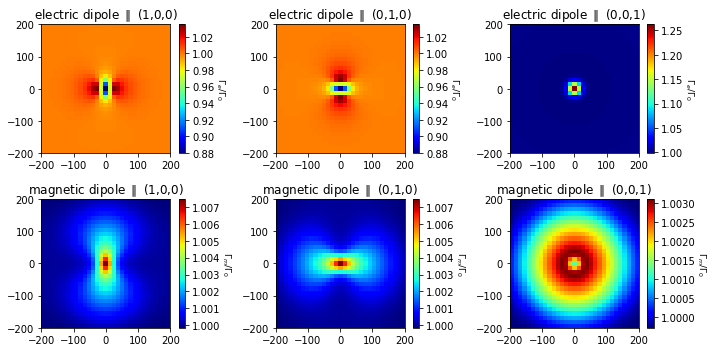

In [4]:
## list of dipole test orientations
dp_list = [[1, 0, 0], 
           [0, 1, 0], 
           [0, 0, 1]]

plt.figure(figsize=(10,5))
for i, (mx,my,mz) in enumerate(dp_list):

    SBB_map_e = linear.decay_eval(sim_p, SBB_p[0], mx,my,mz, verbose=1)
    SBB_map_m = linear.decay_eval(sim_m, SBB_m[0], mx,my,mz, verbose=1)
    
    
    plt.subplot(2,3,i+1, aspect='equal')
    plt.title(r"{} dipole $\parallel$ ({},{},{})".format('electric',mx,my,mz))
    visu.scalarfield(SBB_map_e, cmap='jet', show=False)
    cbar = plt.colorbar()
    cbar.set_label(r'$\Gamma_e / \Gamma_0$', rotation=270, labelpad=12, fontsize=9)
        
    plt.subplot(2,3,i+4, aspect='equal')
    plt.title(r"{} dipole $\parallel$ ({},{},{})".format('magnetic',mx,my,mz))
    visu.scalarfield(SBB_map_m, cmap='jet', show=False)
    cbar = plt.colorbar()
    cbar.set_label(r'$\Gamma_m / \Gamma_0$', rotation=270, labelpad=12, fontsize=9)
    
    

plt.tight_layout()

plt.show()

The first observation is the inverted contrast when comparing electric and magnetic dipole.
Another noteworthy observation is the much narrower confinement of the features in the case of an electric dipole compared to the magnetic transition. Furthermore, also the magnitude of the decay rate variation is much stronger for the electric dipole.
Both phenomena can be attributed to the more *direct* interaction of an electric dipole with the nano-structure, compared to the rather *indirect* magnetic response of the itself *non-magnetic* nano-sphere.